In [1]:
#with this piece of code we measure the suitablity of data for PCA
#the first step is importing all of the necessary libraries for our task
#factor_analyzer is a library providing examinations of sphericity and kmo value on datasets
import pandas as pd
import numpy as np
from factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from sklearn.preprocessing import StandardScaler

#locating the dataset prepared for our purposes
path = 'data/PCdata.csv'
X = pd.read_csv(path, index_col=None)

#scaling the data before any further actions can prevent biases relevant to vast variety in the variances
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#calculating suitablity criteria
_, kmo_model = calculate_kmo(X)
bartlett = calculate_bartlett_sphericity(X)

print(f'The results indicate the KMO value of {kmo_model}')
print(f'And the P_value of {bartlett[1]} in bartlett test of sphericity')

The results indicate the KMO value of 0.914033610712792
And the P_value of 0.0 in bartlett test of sphericity


/home/kooloosh/anaconda3/envs/py37/lib/python3.7/site-packages/factor_analyzer/utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


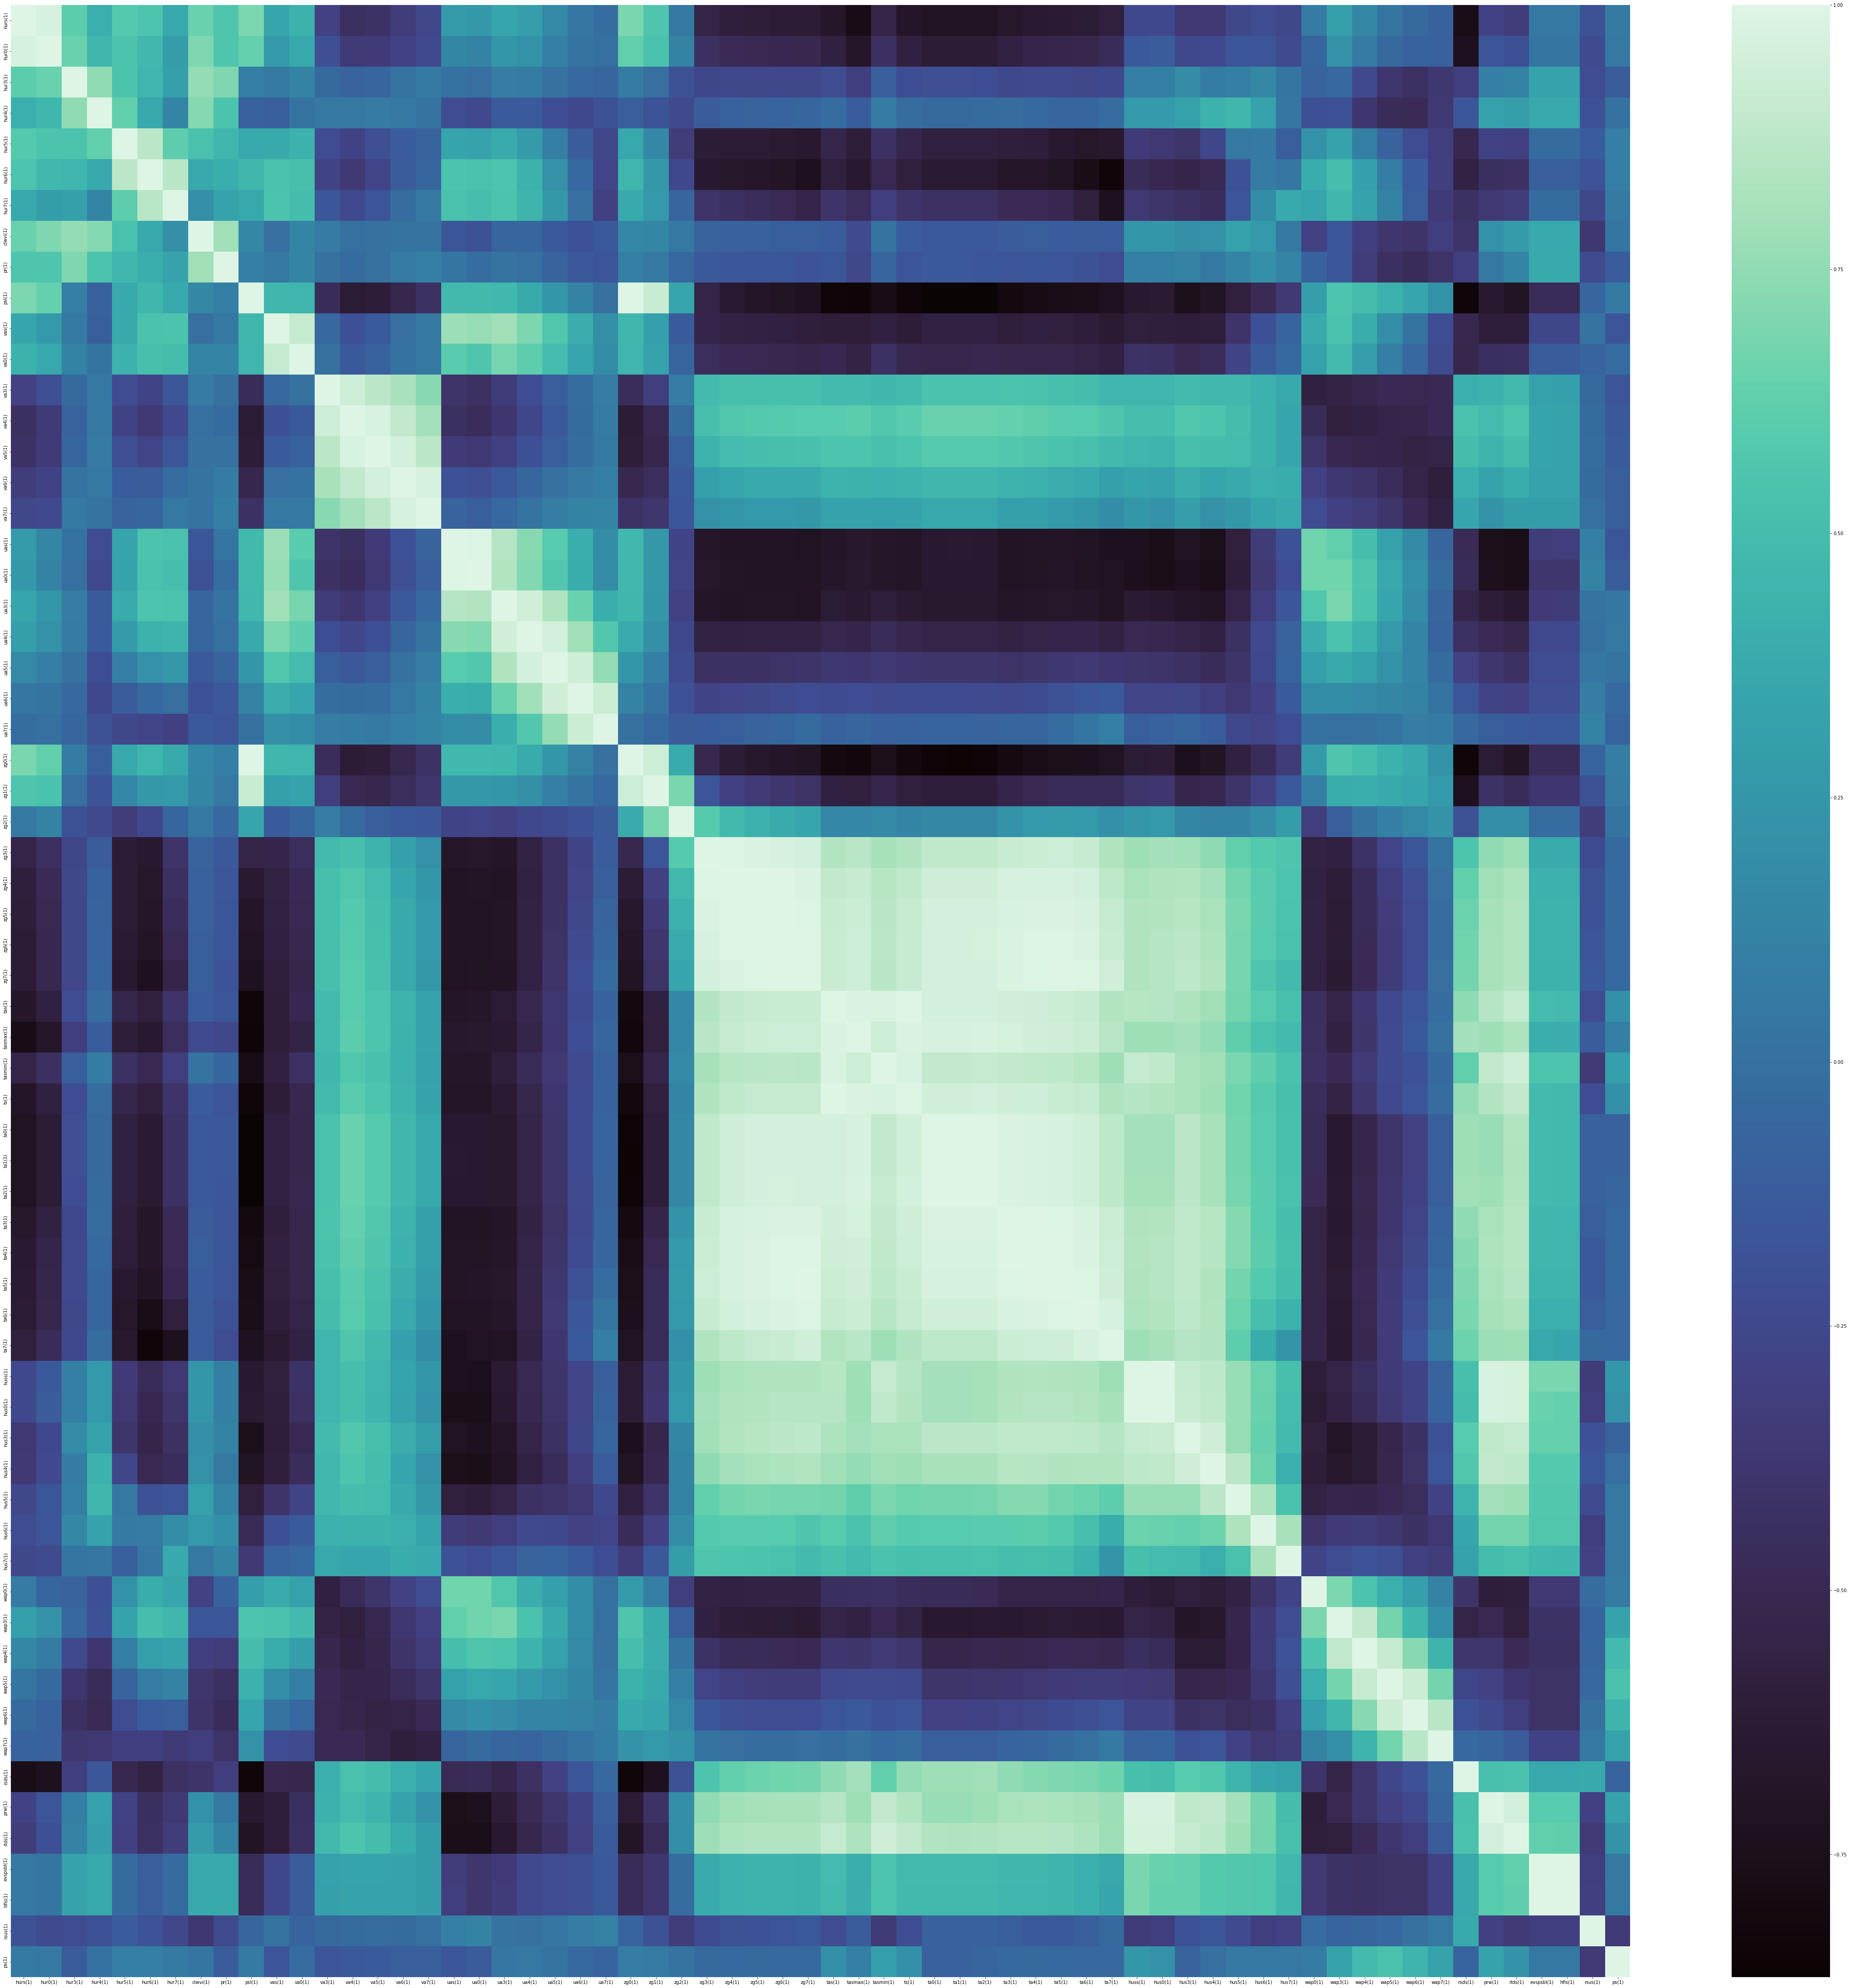

In [2]:
#this part includes calculating pearson correlation of variables to each other
#a heatmap will be generated to better represent the information
#at last the figure is saved in output folder for closer inspections
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(80, 80))
sns.heatmap(X.corr(), cmap="mako")
plt.savefig('output/PearsonCorrelation.png')
plt.show()

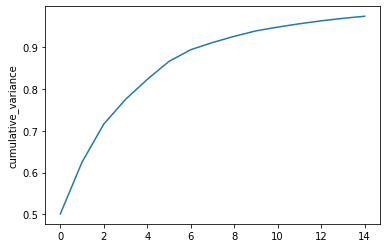

In [11]:
#now the PCA transformation is done by decomposition module
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
pca.fit(X)

#the explained variance for 15 components is provided and illustrated in a cumulative format
#this helps highlighting the number of important components
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))
sns.lineplot(data=pd.Series(cumulative_variance, name='cumulative_variance'))
plt.savefig('output/explained_variance.png')

#loading values for first three components is extracted and saved in output folder for further clustering
Loadings = pd.DataFrame(pca.components_.T[:, :3], columns=['PC1', 'PC2', 'PC3'], index=X.columns)
Loadings.to_csv('output/pca_loadings.csv')

/home/kooloosh/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


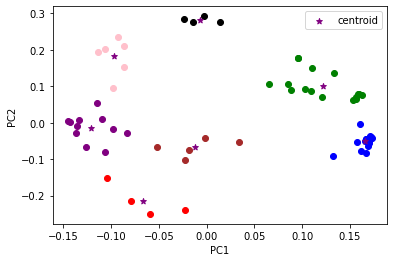

In [12]:
#with loading values in hand, they are clustered using KMeans method
#each plot consists of two paired PCs 
from sklearn.cluster import KMeans

km = KMeans(n_clusters=7)
Loadings.cluster = km.fit_predict(Loadings[['PC1', 'PC2']])

df1 = Loadings[Loadings.cluster==0]
df2 = Loadings[Loadings.cluster==1]
df3 = Loadings[Loadings.cluster==2]
df4 = Loadings[Loadings.cluster==3]
df5 = Loadings[Loadings.cluster==4]
df6 = Loadings[Loadings.cluster==5]
df7 = Loadings[Loadings.cluster==6]
plt.scatter(df1.PC1,df1.PC2,color='green')
plt.scatter(df2.PC1,df2.PC2,color='red')
plt.scatter(df3.PC1,df3.PC2,color='black')
plt.scatter(df4.PC1,df4.PC2,color='purple')
plt.scatter(df5.PC1,df5.PC2,color='blue')
plt.scatter(df6.PC1,df6.PC2,color='pink')
plt.scatter(df7.PC1,df7.PC2,color='brown')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.savefig('output/PC1xPC2.png')

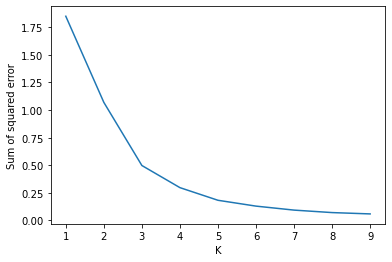

In [13]:
#this part helps us find the best suited number of clusters
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(Loadings[['PC1','PC2']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
#at last using the clusters and interpreting them(explaination is mentioned in the paper)
#we have screened the datasets into a dataset with seven parameters.
#since we use MI in different occasions the code is inserted below as a general use
from sklearn.feature_selection import mutual_info_regression as mi

X = pd.read_csv('data/allpoints.csv')
y = pd.read_csv('data/y_pr.csv')

MI = pd.series(data=mi(X, np.array(y)), index=X.columns, name=y.columns[0])
MI.sort_values(ascending=False)